In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
pd.set_option('display.max_columns', None)
drive.mount('/drive')

Mounted at /drive


In [2]:
df = pd.read_csv('../drive/Shared drives/FI Consulting (Business Analytics)/hmda_22_sample.csv')
df.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,549300NOCASXPA34X033,19124,TX,48113.0,4.811302e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,5,2,1,1,2,2,2,2,15000,NaN,0.0,NaN,2,0.0,NaN,0.0,NaN,NaN,36.0,NaN,NaN,2,2,2,2,355000.0,1,1,3,5,1,NaN,NaN,NaN,9,9,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,8888,8888,NaN,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,8361,76.01,97400,80.0,1376,2031,18
1,2022,254900LEJ4HP6RMWD374,14540,KY,21227.0,2.122701e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,0,2,1,2,2,2,1,2,95000,94.6,5.0,NaN,2,NaN,0.0,NaN,NaN,NaN,120,NaN,NaN,1,1,2,2,275000,1,1,3,5,1,NaN,85.0,20%-<30%,8,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,1,4,2,5,1,4,25-34,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7759,22.19,70200,132.0,1741,2427,28
2,2022,549300E2UX99HKDBR481,11244,CA,6059.0,6.059022e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,5,0,2,1,31,1,2,2,2,295000,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,2,2,2,2,NaN,1,1,3,5,1,NaN,180.0,NaN,9,9,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,3,5,2,4,65-74,9999,Yes,NaN,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3665,40.71,119100,163.0,980,1065,37
3,2022,5493001GDRY0EL7VG372,16700,SC,45019.0,4.501901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,71,2,1,1,1,2,2,2,575000,69.634,4.375,0.587,2,4257.8,NaN,1250.0,NaN,NaN,360,NaN,NaN,2,2,2,2,815000,1,1,3,5,1,NaN,139.0,30%-<36%,3,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,35-44,9999,No,NaN,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3111,50.69,96400,72.0,1036,1483,27
4,2022,QFROUN1UWUYU0DVIWD51,24340,MI,26139.0,2.613902e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hisp

## Below are the columns we will use as predictors for the Approved/Denied Model

In [3]:
columns_to_keep = ['derived_loan_product_type', 'derived_dwelling_category', 'action_taken', 'purchaser_type', 'loan_type', 'loan_purpose', 'loan_amount', 'combined_loan_to_value_ratio',
                'interest_rate', 'loan_term', 'property_value', 'income', 'debt_to_income_ratio', 'applicant_age']

df = df[columns_to_keep]

In [4]:
df.head()

,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,loan_type,loan_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,income,debt_to_income_ratio,applicant_age
0,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,6,5,1,1,15000,NaN,0.0,36.0,355000.0,NaN,NaN,8888
1,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,1,0,1,2,95000,94.6,5.0,120,275000,85.0,20%-<30%,25-34
2,Conventional:First Lien,Single Family (1-4 Units):Site-Built,5,0,1,31,295000,NaN,NaN,96.0,NaN,180.0,NaN,65-74
3,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,71,1,1,575000,69.634,4.375,360,815000,139.0,30%-<36%,35-44
4,Conventional:First Lien,Single Family (1-4 Units):Site-Built,3,0,1,31,125000,40.537,NaN,120,NaN,80.0,>60%,55-64


## Let's start with taking a quick description of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608021 entries, 0 to 1608020
Data columns (total 14 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   derived_loan_product_type     1608021 non-null  object 
 1   derived_dwelling_category     1608021 non-null  object 
 2   action_taken                  1608021 non-null  int64  
 3   purchaser_type                1608021 non-null  int64  
 4   loan_type                     1608021 non-null  int64  
 5   loan_purpose                  1608021 non-null  int64  
 6   loan_amount                   1608021 non-null  int64  
 7   combined_loan_to_value_ratio  1079788 non-null  object 
 8   interest_rate                 1051025 non-null  object 
 9   loan_term                     1581287 non-null  object 
 10  property_value                1272756 non-null  object 
 11  income                        1426238 non-null  float64
 12  debt_to_income_ratio        

In [6]:
# Dataset Dimesions
print('Dataset Dimensions:', df.shape)

Dataset Dimensions: (1608021, 14)


## Action Taken - Traget Variable

In [7]:
# This model will focus on the approved loan status data. Let's take a look at the distribution of the loan status.
# Calculate the value counts
unique_values_counts = df['action_taken'].value_counts()

total_values = unique_values_counts.sum()
percentage_values = (unique_values_counts / total_values) * 100
counts_and_percentages = pd.DataFrame({'Count': unique_values_counts, 'Percentage': percentage_values})

print(counts_and_percentages)

    Count  Percentage
1  839769   52.223758
3  249714   15.529275
4  221858   13.796959
6  155562    9.674127
5   79249    4.928356
2   41705    2.593561
8   12973    0.806768
7    7191    0.447196


### The only numerical values relevant to this model will be 1, 2, 3. These are the meanings of the numerical values:
* 1 - Loan originated
* 2 - Application approved but not accepted
* 3 - Application denied

In [8]:
# Keep only rows where action_taken is 1, 2
df = df[df['action_taken'].isin([1, 2])]

# Merge the number 1 and 2 values in the action_taken column into a single value (1)
df['action_taken'] = df['action_taken'].replace(2, 1)

# Calculate the distribution of the loan status after filtering and merging
unique_values_counts = df['action_taken'].value_counts()
total_values = unique_values_counts.sum()
percentage_values = (unique_values_counts / total_values) * 100
counts_and_percentages = pd.DataFrame({'Count': unique_values_counts, 'Percentage': percentage_values})

# Display the counts and percentages
print(counts_and_percentages)


    Count  Percentage
1  881474       100.0


# Prepare the Data for Machine Learning

## Clean the Data

### 1. Missing Values

In [9]:
# Find missing values
missing_values = df.isnull().sum()
print(missing_values)

derived_loan_product_type           0
derived_dwelling_category           0
action_taken                        0
purchaser_type                      0
loan_type                           0
loan_purpose                        0
loan_amount                         0
combined_loan_to_value_ratio    35153
interest_rate                    2926
loan_term                       10629
property_value                   8851
income                          43789
debt_to_income_ratio            44184
applicant_age                       0
dtype: int64


### Combined Loan to Value Ratio

In [10]:
# Combined Loan to Value Ratio

# Convert 'combined_loan_to_value_ratio' to numeric, coercing any errors to NaN
df['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')

# Summary statistics for 'combined_loan_to_value_ratio' after conversion
summary = df['combined_loan_to_value_ratio'].describe()
print(summary)

count    8.232500e+05
mean     9.486397e+01
std      1.928740e+04
min      6.000000e-02
25%      6.137200e+01
50%      7.883600e+01
75%      9.000000e+01
max      1.750000e+07
Name: combined_loan_to_value_ratio, dtype: float64


In [11]:
# Using the median for imputation to minimize the impact of outliers
# Filling missing values in 'combined_loan_to_value_ratio' with its median
median = df['combined_loan_to_value_ratio'].median()
df['combined_loan_to_value_ratio'].fillna(median, inplace=True)

# Checking if the missing values are filled
missing_values_cltv_after = df['combined_loan_to_value_ratio'].isnull().sum()
print(missing_values_cltv_after)

0


### Interest rate

In [12]:
# Interst rate

# Convert 'Interst rate' to numeric, coercing any errors to NaN
df['interest_rate'] = pd.to_numeric(df['interest_rate'], errors='coerce')

# Summary statistics for 'interest_rate' after conversion
summary = df['interest_rate'].describe()
print(summary)

count    855425.000000
mean          4.787092
std           1.574808
min           0.000000
25%           3.640000
50%           4.750000
75%           5.750000
max          47.750000
Name: interest_rate, dtype: float64


In [13]:
# Using the median for imputation to minimize the impact of outliers
# Filling missing values in 'interest_rate' with its median
median = df['interest_rate'].median()
df['interest_rate'].fillna(median, inplace=True)

# Checking if the missing values are filled
missing_values_cltv_after = df['interest_rate'].isnull().sum()
print(missing_values_cltv_after)

0


### Loan Term

In [14]:
# Convert 'loan_term' to float to accommodate both integers and float representations
df['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')

# Summary statistics for 'loan_term' after conversion
summary = df['loan_term'].describe()
print(summary)

count    847811.000000
mean        319.827548
std          84.629180
min           1.000000
25%         358.000000
50%         360.000000
75%         360.000000
max         600.000000
Name: loan_term, dtype: float64


In [15]:
# Impute missing 'loan_term' values with the median
median = df['loan_term'].median()
df['loan_term'].fillna(median, inplace=True)

# Checking if the missing values are filled
missing_values_cltv_after = df['loan_term'].isnull().sum()
print(missing_values_cltv_after)

0


### Property Value

In [16]:
# Convert 'property_value' to float to accommodate both integers and float representations
df['property_value'] = pd.to_numeric(df['property_value'], errors='coerce')

# Summary statistics for 'loan_term' after conversion
summary = df['property_value'].describe()
print(summary)

count    8.495010e+05
mean     5.881952e+05
std      3.417387e+06
min      5.000000e+03
25%      2.550000e+05
50%      3.850000e+05
75%      5.950000e+05
max      2.147484e+09
Name: property_value, dtype: float64


In [17]:
# Impute missing 'property_value' values with the median
median = df['property_value'].median()
df['property_value'].fillna(median, inplace=True)

# Checking if the missing values are filled
missing_values_cltv_after = df['property_value'].isnull().sum()
print(missing_values_cltv_after)

0


### Income

In [18]:
# Convert 'income' to float to accommodate both integers and float representations
df['income'] = pd.to_numeric(df['income'], errors='coerce')

# Summary statistics for 'loan_term' after conversion
summary = df['income'].describe()
print(summary)

count    8.376850e+05
mean     1.633038e+02
std      5.686886e+03
min     -2.157000e+03
25%      6.600000e+01
50%      1.010000e+02
75%      1.580000e+02
max      3.690126e+06
Name: income, dtype: float64


In [19]:
# Impute missing 'income' values with the median
median = df['income'].median()
df['income'].fillna(median, inplace=True)

# Checking if the missing values are filled
missing_values_cltv_after = df['income'].isnull().sum()
print(missing_values_cltv_after)

0


### Debt to Income Ratio

In [20]:
# Assuming your DataFrame is named 'df'
df.dropna(subset=['debt_to_income_ratio'], inplace=True)


In [21]:
missing_values = df.isnull().sum()
print(missing_values)

derived_loan_product_type       0
derived_dwelling_category       0
action_taken                    0
purchaser_type                  0
loan_type                       0
loan_purpose                    0
loan_amount                     0
combined_loan_to_value_ratio    0
interest_rate                   0
loan_term                       0
property_value                  0
income                          0
debt_to_income_ratio            0
applicant_age                   0
dtype: int64


In [22]:
df.shape

(837290, 14)

### Let's examine the unique values of the categorical data before encoding

In [23]:
# count values for derived_loan_product_type
df['derived_loan_product_type'].value_counts()

Conventional:First Lien          545018
Conventional:Subordinate Lien    149598
FHA:First Lien                    82498
VA:First Lien                     54262
FSA/RHS:First Lien                 5708
FSA/RHS:Subordinate Lien            131
FHA:Subordinate Lien                 71
VA:Subordinate Lien                   4
Name: derived_loan_product_type, dtype: int64

In [24]:
# List of values to be removed
values_to_drop = [
    "FSA/RHS:First Lien",
    "FSA/RHS:Subordinate Lien",
    "FHA:Subordinate Lien",
    "VA:Subordinate Lien"
]

# Drop rows where 'derived_loan_product_type' contains any of the specified values
df = df[~df['derived_loan_product_type'].isin(values_to_drop)]

df['derived_loan_product_type'].value_counts()


Conventional:First Lien          545018
Conventional:Subordinate Lien    149598
FHA:First Lien                    82498
VA:First Lien                     54262
Name: derived_loan_product_type, dtype: int64

### Derived Dwelling Category

In [25]:
df['derived_dwelling_category'].value_counts()

Single Family (1-4 Units):Site-Built      806398
Single Family (1-4 Units):Manufactured     23767
Multifamily:Site-Built                      1173
Multifamily:Manufactured                      38
Name: derived_dwelling_category, dtype: int64

In [26]:
# List of values to be removed
values_to_drop = [
    "Multifamily:Site-Built",
    "Multifamily:Manufactured",
]

# Drop rows where 'derived_loan_product_type' contains any of the specified values
df = df[~df['derived_dwelling_category'].isin(values_to_drop)]

df['derived_dwelling_category'].value_counts()

Single Family (1-4 Units):Site-Built      806398
Single Family (1-4 Units):Manufactured     23767
Name: derived_dwelling_category, dtype: int64

In [27]:
df.head()

,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,loan_type,loan_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,income,debt_to_income_ratio,applicant_age
1,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,1,0,1,2,95000,94.600,5.000,120.0,275000.0,85.0,20%-<30%,25-34
3,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,71,1,1,575000,69.634,4.375,360.0,815000.0,139.0,30%-<36%,35-44
5,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,0,1,1,1165000,80.000,3.625,360.0,1455000.0,479.0,20%-<30%,45-54
6,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,0,1,4,255000,18.041,0.990,360.0,1385000.0,135.0,47,55-64
7,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,1,1,32,295000,79.000,6.375,360.0,375000.0,156.0,42,45-54


### Loan Term

In [28]:
df['loan_term'].value_counts()

360.0    620994
180.0     64920
240.0     41003
300.0     35238
120.0     27743
          ...  
229.0         1
51.0          1
206.0         1
250.0         1
91.0          1
Name: loan_term, Length: 351, dtype: int64

In [29]:
# Define the frequency threshold
frequency_threshold = 5000

# Calculate value counts and filter based on the threshold
common_loan_terms = df['loan_term'].value_counts()
common_loan_terms = common_loan_terms[common_loan_terms > frequency_threshold]

# Keep only rows in df with loan terms that are above the frequency threshold
df = df[df['loan_term'].isin(common_loan_terms.index)]


In [30]:
df['loan_term'].value_counts()

360.0    620994
180.0     64920
240.0     41003
300.0     35238
120.0     27743
480.0     10973
60.0       7619
Name: loan_term, dtype: int64

### Debt to Income Ratio

In [31]:
df['debt_to_income_ratio'].value_counts()

20%-<30%    141877
30%-<36%    133809
<20%         54646
50%-60%      52422
44           36187
42           34536
49           31780
41           31168
43           30703
40           29922
39           29425
38           27366
37           26749
45           25783
36           25629
48           23890
47           22780
46           22583
Exempt       21735
>60%          5500
Name: debt_to_income_ratio, dtype: int64

### Aplicant Age

In [32]:
df['applicant_age'].value_counts()

35-44    206596
45-54    173852
25-34    167534
55-64    133082
65-74     73831
<25       24937
>74       24841
8888       3817
Name: applicant_age, dtype: int64

### Purchaser Type

In [33]:
df['purchaser_type'].value_counts()

0     335350
1     136162
3     107684
71     76292
2      73727
6      38787
9      23263
8       8902
5       5428
72      2893
4          2
Name: purchaser_type, dtype: int64

### Loan Type

In [34]:
df['loan_type'].value_counts()

1    672473
2     82089
3     53928
Name: loan_type, dtype: int64

### Loan Purpose

In [35]:
df['loan_purpose'].value_counts()

1     422733
32    153188
31     93690
2      77780
4      61073
5         26
Name: loan_purpose, dtype: int64

In [36]:
df.head(10)

,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,loan_type,loan_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,property_value,income,debt_to_income_ratio,applicant_age
1,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,1,0,1,2,95000,94.600,5.000,120.0,275000.0,85.0,20%-<30%,25-34
3,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,71,1,1,575000,69.634,4.375,360.0,815000.0,139.0,30%-<36%,35-44
5,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,0,1,1,1165000,80.000,3.625,360.0,1455000.0,479.0,20%-<30%,45-54
6,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,0,1,4,255000,18.041,0.990,360.0,1385000.0,135.0,47,55-64
7,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,1,1,32,295000,79.000,6.375,360.0,375000.0,156.0,42,45-54
9,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,1,1,1,205000,80.000,5.500,360.0,255000.0,82.0,38,65-74
11,FHA:First Lien,Single Family (1-4 Units):Site-Built,1,0,2,1,225000,94.541,4.250,360.0,225000.0,66.0,50%-60%,25-34
13,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,1,1,32,205000,43.685,4.875,360.0,475000.0,58.0,38,45-54
15,FHA:First Lien,Single Family (1-4 Units):Site-Built,1,71,2,31,255000,82.295,4.625,360.0,305000.0,75.0,48,35-44
16,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,3,1,1,395000,85.000,5.375,360.0,465000.0,50.0,48,35-44


## Create High priced column

In [38]:
df['derived_loan_product_type'].value_counts()

Conventional:First Lien          528930
Conventional:Subordinate Lien    143543
FHA:First Lien                    82089
VA:First Lien                     53928
Name: derived_loan_product_type, dtype: int64

### The mean of each loan type

In [39]:
mean_interest_rate_loan_type = df.groupby('derived_loan_product_type')['interest_rate'].mean()
mean_interest_rate_loan_type

derived_loan_product_type
Conventional:First Lien          4.662696
Conventional:Subordinate Lien    5.090141
FHA:First Lien                   4.923843
VA:First Lien                    4.591270
Name: interest_rate, dtype: float64

In [40]:
# Dictionary containing loan types and their corresponding interest rates
interest_rates = {
    'Conventional:First Lien': 4.662825,
    'Conventional:Subordinate Lien': 5.089916,
    'FHA:First Lien': 4.923846,
    'VA:First Lien': 4.591321,
}

# Create the new column using map() function
df['mean_interest_rate_loan_type'] = df['derived_loan_product_type'].map(interest_rates)

In [41]:
# Calculate the difference between 'interest_rate' and 'mean_interest'
df['difference'] = df['interest_rate'] - df['mean_interest_rate_loan_type']

# Define a condition and assign 1 or 0 based on the condition
df['no_high_priced'] = (df['difference'] < 1.5).astype(int)

In [42]:
df['no_high_priced'].value_counts()

1    699492
0    108998
Name: no_high_priced, dtype: int64

## Encode categorical Data

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your original dataframe and you've listed your nominal columns
nominal_columns = ['derived_loan_product_type', 'derived_dwelling_category',
                   'purchaser_type', 'loan_type', 'loan_purpose', 'loan_term',
                   'applicant_age', 'debt_to_income_ratio',]

# One-hot encode the nominal columns
df_encoded = pd.get_dummies(df, columns=nominal_columns)

# Encode the 'action_taken' column: 1 -> 0, 3 -> 1
df_encoded['action_taken_encoded'] = df_encoded['action_taken'].map({1: 0, 3: 1})

df_encoded.drop(['action_taken'], axis=1, inplace=True)


In [44]:
df_encoded.head()

,loan_amount,combined_loan_to_value_ratio,interest_rate,property_value,income,mean_interest_rate_loan_type,difference,no_high_priced,derived_loan_product_type_Conventional:First Lien,derived_loan_product_type_Conventional:Subordinate Lien,derived_loan_product_type_FHA:First Lien,derived_loan_product_type_VA:First Lien,derived_dwelling_category_Single Family (1-4 Units):Manufactured,derived_dwelling_category_Single Family (1-4 Units):Site-Built,purchaser_type_0,purchaser_type_1,purchaser_type_2,purchaser_type_3,purchaser_type_4,purchaser_type_5,purchaser_type_6,purchaser_type_8,purchaser_type_9,purchaser_type_71,purchaser_type_72,loan_type_1,loan_type_2,loan_type_3,loan_purpose_1,loan_purpose_2,loan_purpose_4,loan_purpose_5,loan_purpose_31,loan_purpose_32,loan_term_60.0,loan_term_120.0,loan_term_180.0,loan_term_240.0,loan_term_300.0,loan_term_360.0,loan_term_480.0,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_8888,applicant_age_<25,applicant_age_>74,debt_to_income_ratio_20%-<30%,debt_to_income_ratio_30%-<36%,debt_to_income_ratio_36,debt_to_income_ratio_37,debt_to_income_ratio_38,debt_to_income_ratio_39,debt_to_income_ratio_40,debt_to_income_ratio_41,debt_to_income_ratio_42,debt_to_income_ratio_43,debt_to_income_ratio_44,debt_to_income_ratio_45,debt_to_income_ratio_46,debt_to_income_ratio_47,debt_to_income_ratio_48,debt_to_income_ratio_49,debt_to_income_ratio_50%-60%,debt_to_income_ratio_<20%,debt_to_income_ratio_>60%,debt_to_income_ratio_Exempt,action_taken_encoded
1,95000,94.600,5.000,275000.0,85.0,5.089916,-0.089916,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,575000,69.634,4.375,815000.0,139.0,4.662825,-0.287825,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1165000,80.000,3.625,1455000.0,479.0,4.662825,-1.037825,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,255000,18.041,0.990,1385000.0,135.0,4.662825,-3.672825,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,295000,79.000,6.375,375000.0,156.0,4.662825,1.712175,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df_encoded.shape

(808490, 70)

## Numerical Data Scaling

In [46]:
# Identify numerical columns (example)
numerical_cols = ['loan_amount', 'combined_loan_to_value_ratio', 'property_value', 'income']

# Apply scaling to numerical columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [47]:
df_encoded.head()

,loan_amount,combined_loan_to_value_ratio,interest_rate,property_value,income,mean_interest_rate_loan_type,difference,no_high_priced,derived_loan_product_type_Conventional:First Lien,derived_loan_product_type_Conventional:Subordinate Lien,derived_loan_product_type_FHA:First Lien,derived_loan_product_type_VA:First Lien,derived_dwelling_category_Single Family (1-4 Units):Manufactured,derived_dwelling_category_Single Family (1-4 Units):Site-Built,purchaser_type_0,purchaser_type_1,purchaser_type_2,purchaser_type_3,purchaser_type_4,purchaser_type_5,purchaser_type_6,purchaser_type_8,purchaser_type_9,purchaser_type_71,purchaser_type_72,loan_type_1,loan_type_2,loan_type_3,loan_purpose_1,loan_purpose_2,loan_purpose_4,loan_purpose_5,loan_purpose_31,loan_purpose_32,loan_term_60.0,loan_term_120.0,loan_term_180.0,loan_term_240.0,loan_term_300.0,loan_term_360.0,loan_term_480.0,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_8888,applicant_age_<25,applicant_age_>74,debt_to_income_ratio_20%-<30%,debt_to_income_ratio_30%-<36%,debt_to_income_ratio_36,debt_to_income_ratio_37,debt_to_income_ratio_38,debt_to_income_ratio_39,debt_to_income_ratio_40,debt_to_income_ratio_41,debt_to_income_ratio_42,debt_to_income_ratio_43,debt_to_income_ratio_44,debt_to_income_ratio_45,debt_to_income_ratio_46,debt_to_income_ratio_47,debt_to_income_ratio_48,debt_to_income_ratio_49,debt_to_income_ratio_50%-60%,debt_to_income_ratio_<20%,debt_to_income_ratio_>60%,debt_to_income_ratio_Exempt,action_taken_encoded
1,-0.585900,0.273132,5.000,-0.321581,-0.014033,5.089916,-0.089916,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.791562,-0.055966,4.375,0.409543,-0.004034,4.662825,-0.287825,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.484693,0.080677,3.625,1.276061,0.058921,4.662825,-1.037825,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-0.126746,-0.736058,0.990,1.181285,-0.004775,4.662825,-3.672825,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,-0.011958,0.067495,6.375,-0.186188,-0.000886,4.662825,1.712175,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808490 entries, 1 to 1608019
Data columns (total 70 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   loan_amount                                                       808490 non-null  float64
 1   combined_loan_to_value_ratio                                      808490 non-null  float64
 2   interest_rate                                                     808490 non-null  float64
 3   property_value                                                    808490 non-null  float64
 4   income                                                            808490 non-null  float64
 5   mean_interest_rate_loan_type                                      808490 non-null  float64
 6   difference                                                        808490 non-null  float64
 7   no_high_priced     

## Machine Learning Models

### 1. Logistic Regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df_encoded.drop(['no_high_priced', 'mean_interest_rate_loan_type', 'interest_rate', 'difference', 'action_taken_encoded'	], axis=1)
y = df_encoded['no_high_priced']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred1 = logreg.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# Print a detailed classification report
print(classification_report(y_test, y_pred1))

Accuracy: 0.8713775062152902
              precision    recall  f1-score   support

           0       0.74      0.07      0.13     21838
           1       0.87      1.00      0.93    139860

    accuracy                           0.87    161698
   macro avg       0.81      0.53      0.53    161698
weighted avg       0.85      0.87      0.82    161698



In [50]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")


Sensitivity (Recall): 0.9959101959101959
Specificity: 0.07381628354244894
Positive Predictive Value (Precision): 0.8732023521446394
Negative Predictive Value: 0.7380952380952381


### 2. Decision Trees

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
tree_clf = DecisionTreeClassifier()

# Train the model on the training data
tree_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred2 = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))


Accuracy: 0.7944872540167472
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.29      0.28     21838
           1       0.89      0.87      0.88    139860

    accuracy                           0.79    161698
   macro avg       0.58      0.58      0.58    161698
weighted avg       0.80      0.79      0.80    161698



In [52]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")


Sensitivity (Recall): 0.8731302731302731
Specificity: 0.29082333547028116
Positive Predictive Value (Precision): 0.8874515817242357
Negative Predictive Value: 0.2635816559452169


### 3. Random Forests

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred3 = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred3))


Accuracy: 0.8688357308068126
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.15      0.23     21838
           1       0.88      0.98      0.93    139860

    accuracy                           0.87    161698
   macro avg       0.72      0.56      0.58    161698
weighted avg       0.84      0.87      0.83    161698



In [54]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")


Sensitivity (Recall): 0.9814242814242814
Specificity: 0.14776994230240864
Positive Predictive Value (Precision): 0.8806015153362032
Negative Predictive Value: 0.5539914163090128


### 4. XGBoost

In [55]:
import re
import xgboost as xgb

# Function to clean column names to be XGBoost-compatible: alphanumeric and underscores only
def clean_column_names(columns):
    return [re.sub(r'\W+', '_', cname) for cname in columns]

# Clean your DataFrame column names
X.columns = clean_column_names(X.columns)

# If you've already split your data, make sure to apply the same to your training and test sets
X_train.columns = X.columns
X_test.columns = X.columns

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred4 = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred4)
class_report = classification_report(y_test, y_pred4)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)


Accuracy: 0.876145654244332
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.12      0.21     21838
           1       0.88      0.99      0.93    139860

    accuracy                           0.88    161698
   macro avg       0.82      0.56      0.57    161698
weighted avg       0.86      0.88      0.84    161698



In [56]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")


Sensitivity (Recall): 0.9939367939367939
Specificity: 0.12176023445370456
Positive Predictive Value (Precision): 0.8787604857419196
Negative Predictive Value: 0.7581978899344168


### 5. mXGB

In [57]:
import xgboost as xgb

monotone_constraints = (1, -1)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'monotone_constraints': monotone_constraints,
    'objective': 'reg:squarederror'  # Use 'binary:logistic' for classification tasks
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
preds = bst.predict(dtest)

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

preds_binary = [1 if p > 0.5 else 0 for p in preds]

accuracy = accuracy_score(y_test, preds_binary)
class_report = classification_report(y_test, preds_binary)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.8737708567823969
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.08      0.15     21838
           1       0.87      1.00      0.93    139860

    accuracy                           0.87    161698
   macro avg       0.85      0.54      0.54    161698
weighted avg       0.87      0.87      0.83    161698



In [58]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, preds_binary)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")

Sensitivity (Recall): 0.9973187473187474
Specificity: 0.08251671398479714
Positive Predictive Value (Precision): 0.8743989819522194
Negative Predictive Value: 0.8277446026642168


## Visual Interpretation

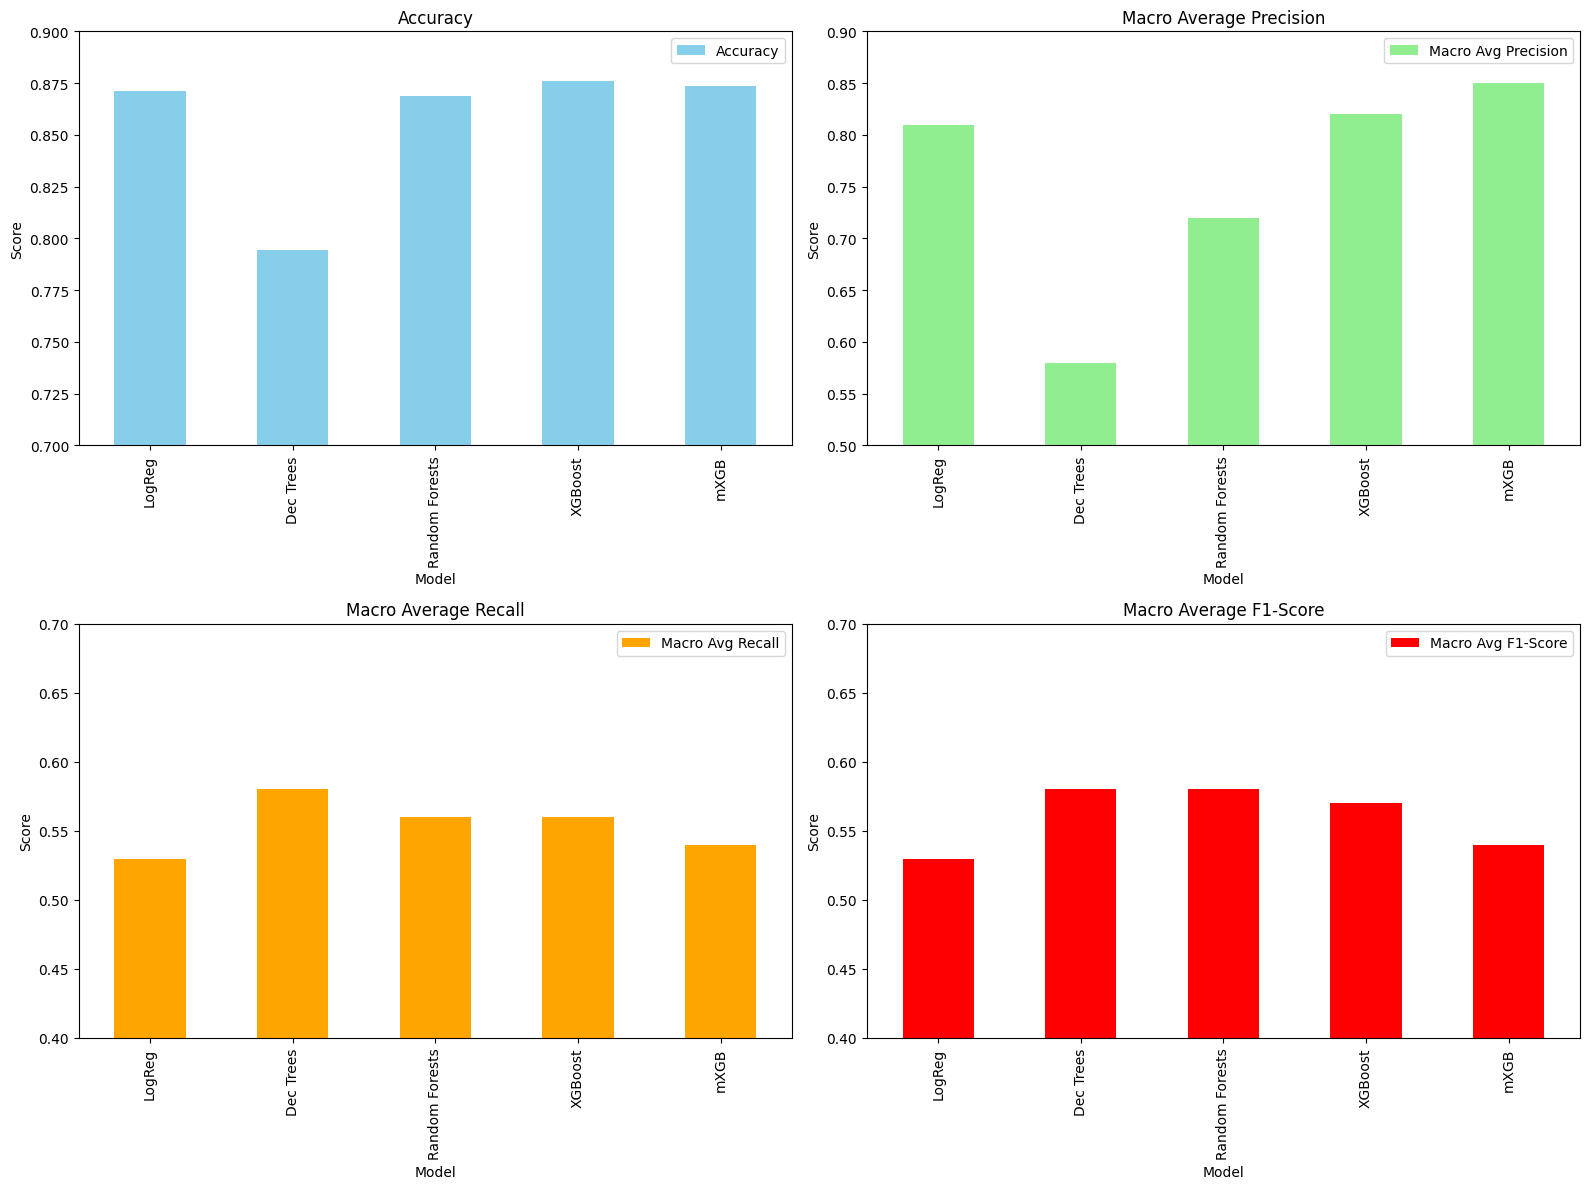

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

model_names = ['LogReg', 'Dec Trees', 'Random Forests', 'XGBoost', 'mXGB']
accuracies = [0.8713775062152902, 0.7944872540167472, 0.8688357308068126, 0.876145654244332, 0.8737708567823969]
macro_avg_precisions = [0.81, 0.58, 0.72, 0.82, 0.85]
macro_avg_recalls = [0.53, 0.58, 0.56, 0.56, 0.54]
macro_avg_f1s = [0.53, 0.58, 0.58, 0.57, 0.54]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Macro Avg Precision': macro_avg_precisions,
    'Macro Avg Recall': macro_avg_recalls,
    'Macro Avg F1-Score': macro_avg_f1s
})

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

metrics_df.plot(x='Model', y='Accuracy', kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([0.7, 0.9])
axs[0, 0].set_ylabel('Score')

metrics_df.plot(x='Model', y='Macro Avg Precision', kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Macro Average Precision')
axs[0, 1].set_ylim([0.5, 0.9])
axs[0, 1].set_ylabel('Score')

metrics_df.plot(x='Model', y='Macro Avg Recall', kind='bar', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Macro Average Recall')
axs[1, 0].set_ylim([0.4, 0.7])
axs[1, 0].set_ylabel('Score')

metrics_df.plot(x='Model', y='Macro Avg F1-Score', kind='bar', ax=axs[1, 1], color='red')
axs[1, 1].set_title('Macro Average F1-Score')
axs[1, 1].set_ylim([0.4, 0.7])
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()


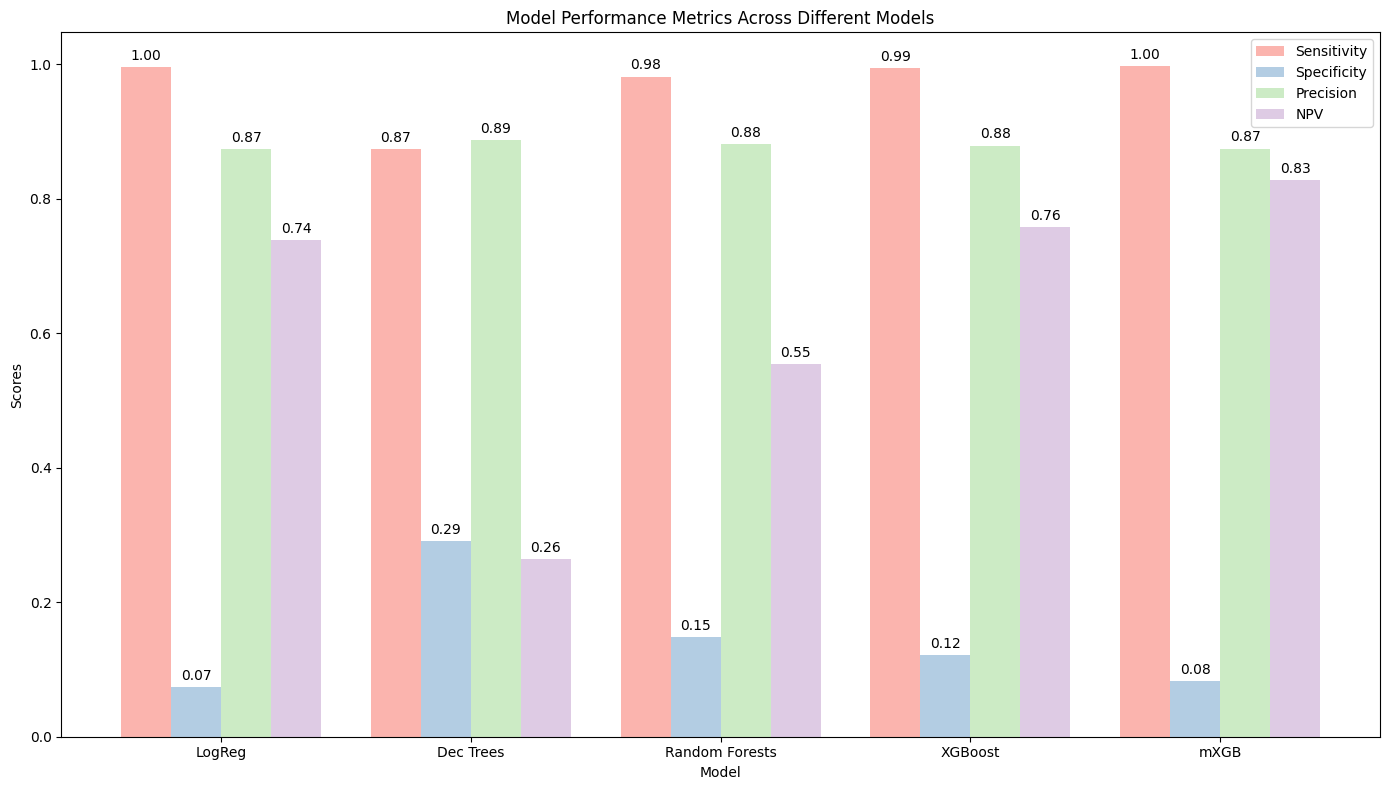

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
model_names = ['LogReg', 'Dec Trees', 'Random Forests', 'XGBoost', 'mXGB']
sensitivity = [0.9959101959101959, 0.8731302731302731, 0.9814242814242814, 0.9939367939367939, 0.9973187473187474]
specificity = [0.07381628354244894, 0.29082333547028116, 0.14776994230240864, 0.12176023445370456, 0.08251671398479714]
precision = [0.8732023521446394, 0.8874515817242357, 0.8806015153362032, 0.8787604857419196, 0.8743989819522194]
npv = [0.738095238095238, 0.2635816559452169, 0.5539914163090128, 0.7581978899344168, 0.8277446026642168]

x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width*1.5, sensitivity, width, label='Sensitivity', color='#fbb4ae')
rects2 = ax.bar(x - width/2, specificity, width, label='Specificity', color='#b3cde3')
rects3 = ax.bar(x + width/2, precision, width, label='Precision', color='#ccebc5')
rects4 = ax.bar(x + width*1.5, npv, width, label='NPV', color='#decbe4')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics Across Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()

plt.show()


Considerations for Model Selection:
Accuracy and F1-Score: XGBoost has the highest accuracy and macro-average F1-score, indicating strong overall performance and a balanced handling of classes. Random Forests also show good performance but slightly lower than XGBoost.

Model Complexity and Interpretability: Logistic Regression provides a good balance between simplicity and performance, making it easier to understand the model's decisions. Decision Trees offer a visual representation of the decision-making process but with lower overall metrics.

XGBoost is the top performer based on the confusion matrix metrics shared. It excels in both identifying true positives (Sensitivity) and true negatives (Specificity), making accurate positive predictions (Precision), and accurately identifying negative cases (Negative Predictive Value).

Recommendation:
Based on the provided metrics, XGBoost appears to be the best performer in terms of the metrics above. It balances the trade-off between performance and complexity well, offering strong predictive capabilities across classes.